In [1]:
import pandas as pd
import sys
sys.path.insert(1, '../../')
import prototype_nn as NN
from torch.utils.data import TensorDataset, DataLoader # For mini batches
from torch import from_numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Content

This notebook looks at the overfitting concept: where a training data, is performing better than the test data. This goes through every epoch and compare the differences between the loss given by the training data and the test data. The notebook also explores the affect of batch size and large batch sizes.

## Dataframes

This is looking at the dataframes of the modules

In [2]:
# newtons..
filename_train = "../../data/train/newtons_cooling_law.csv"
filename_test = "../../data/test/newtons_cooling_law.csv"

In [3]:
newton_train = pd.DataFrame(data= pd.read_csv(filename_train))
newton_test = pd.DataFrame(data= pd.read_csv(filename_test))

This is the training dataframe

In [4]:
newton_train.head()

,x_0,x,y,dydx,state
0,1,0,1.000000,0.315000,Cooling
1,1,1,1.315000,0.310275,Cooling
2,1,2,1.625275,0.305621,Cooling
3,1,3,1.930896,0.301037,Cooling
4,1,4,2.231932,0.296521,Cooling


This is the testing dataframe

In [5]:
newton_test.head()

,x_0,x,y,dy/dx,state
0,61,0,61.000000,-0.585000,Cooling
1,61,1,60.415000,-0.576225,Cooling
2,61,2,59.838775,-0.567582,Cooling
3,61,3,59.271193,-0.559068,Cooling
4,61,4,58.712125,-0.550682,Cooling


This is defining the inputs to put into the neural network, by select the first two columns from the "newton_train" dataframe

In [6]:
inputs = newton_train.iloc[:,[0,1]]
inputs.head()

,x_0,x
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


This is define the targets to put into the neural network, by selecting the 3 columns within the newton train dataframe

In [7]:
targets = newton_train.iloc[:,[2]]
targets.head()

,y
0,1.000000
1,1.315000
2,1.625275
3,1.930896
4,2.231932


## Defining models

Two models are definied small_batch_model to compare how the test and training loss are affected when the batch size is small. In addition, large_batch_model to compare how the test and training loss are affected when the batch size is large

In [8]:
# lr = 0.001, bs = 32, ts = 50, epoch = 20 
small_batch_model = NN.prototype(2, 1, 0.001)
large_batch_model = NN.prototype(2, 1, 0.001)
inputs_tensor = from_numpy(inputs.to_numpy(dtype='float32'))
targets_tensor = from_numpy(targets.to_numpy(dtype='float32'))

This is the inputs and targets as tensor

In [9]:
inputs_tensor, targets_tensor

(tensor([[  1.,   0.],
         [  1.,   1.],
         [  1.,   2.],
         ...,
         [ 60., 197.],
         [ 60., 198.],
         [ 60., 199.]]),
 tensor([[ 1.0000],
         [ 1.3150],
         [ 1.6253],
         ...,
         [23.9352],
         [23.9062],
         [23.8776]]))

## Mini batches

We set up a mini batch. The tensor dataset groups our data into tuples, whle the dataloader group it into mini batches

In [10]:
train_dataset = TensorDataset(inputs_tensor, targets_tensor)
small_batch_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
large_batch_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True) 

This would randomise the newton test dataset

In [11]:
newton_rando = newton_test.sample(frac=1)

This is turning the the inputs and targes from the test set into a tensor

In [12]:
test_inputs_tensor = from_numpy(newton_test.iloc[:,[0,1]].to_numpy(dtype='float32'))
test_targets_tensor = from_numpy(newton_test.iloc[:,[2]].to_numpy(dtype='float32'))

## Training 

Training with small batch size

In [13]:
small_batch_df = small_batch_model.train_model(small_batch_loader, 30, test_inputs_tensor, test_targets_tensor)

Epoch: 0  Train Loss: 14.351261138916016 Test Loss 242.87164306640625 
Epoch: 1  Train Loss: 1.0573413372039795 Test Loss 55.00320816040039 
Epoch: 2  Train Loss: 0.3961348533630371 Test Loss 23.311565399169922 
Epoch: 3  Train Loss: 0.778669536113739 Test Loss 12.819353103637695 
Epoch: 4  Train Loss: 0.554557204246521 Test Loss 14.893723487854004 
Epoch: 5  Train Loss: 0.030442379415035248 Test Loss 15.354687690734863 
Epoch: 6  Train Loss: 0.06807228922843933 Test Loss 16.992063522338867 
Epoch: 7  Train Loss: 0.5661531686782837 Test Loss 24.8622989654541 
Epoch: 8  Train Loss: 0.03720088303089142 Test Loss 11.969482421875 
Epoch: 9  Train Loss: 0.8708438277244568 Test Loss 18.404340744018555 
Epoch: 10  Train Loss: 0.06533312797546387 Test Loss 11.407846450805664 
Epoch: 11  Train Loss: 0.23218557238578796 Test Loss 14.610869407653809 
Epoch: 12  Train Loss: 0.0989922285079956 Test Loss 8.798766136169434 
Epoch: 13  Train Loss: 0.1833149939775467 Test Loss 11.471463203430176 
Epoch

Training with a large batch size

In [14]:
large_batch_df = large_batch_model.train_model(large_batch_loader, 30, test_inputs_tensor, test_targets_tensor)

Epoch: 0  Train Loss: 34.356842041015625 Test Loss 297.8104553222656 
Epoch: 1  Train Loss: 24.67153549194336 Test Loss 269.8815002441406 
Epoch: 2  Train Loss: 21.799999237060547 Test Loss 251.99502563476562 
Epoch: 3  Train Loss: 17.970165252685547 Test Loss 209.81129455566406 
Epoch: 4  Train Loss: 17.356739044189453 Test Loss 217.8455352783203 
Epoch: 5  Train Loss: 16.520198822021484 Test Loss 250.42147827148438 
Epoch: 6  Train Loss: 11.63581371307373 Test Loss 184.8941192626953 
Epoch: 7  Train Loss: 10.40722370147705 Test Loss 166.23117065429688 
Epoch: 8  Train Loss: 5.549954891204834 Test Loss 126.68221282958984 
Epoch: 9  Train Loss: 4.117671012878418 Test Loss 101.0201644897461 
Epoch: 10  Train Loss: 2.5587375164031982 Test Loss 66.14667510986328 
Epoch: 11  Train Loss: 1.8106136322021484 Test Loss 54.5350341796875 
Epoch: 12  Train Loss: 1.1325045824050903 Test Loss 62.31626892089844 
Epoch: 13  Train Loss: 1.1356666088104248 Test Loss 44.35896682739258 
Epoch: 14  Train 

## Graphs

graphs

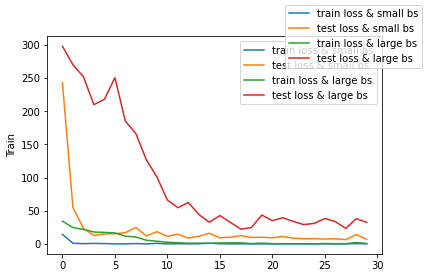

In [15]:
fig, ax = plt.subplots()
sns.lineplot(data=small_batch_df, x=np.arange(0, 30), y="Train", ax=ax, label="train loss & small bs", markers=True)
sns.lineplot(data=small_batch_df,x=np.arange(0, 30), y="Test", ax=ax, label="test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_df, x=np.arange(0, 30), y="Train", ax=ax, label="train loss & large bs", markers=True)
sns.lineplot(data=large_batch_df,x=np.arange(0, 30), y="Test", ax=ax, label="test loss & large bs" , markers=True)
fig.legend()